#### 0. Import basic methods (a.o. from source2.py)

In [2]:
from source2 import *
import numpy as np

In [3]:
# load basic info from the Input sheet
mapping = load_input_from_xls(filename=r'Case 1 - Input Sheet.xlsm')
Inputs = extract_scenario(mapping, 'Scenario1')

##### 1. prepare input data and generate objects
We are testing the following cases:
##### 1.1 Turbines

In [4]:
turbine_data = get_object_data(Inputs=Inputs, 
                               subsystem='Wind energy source & Transport', 
                               element='Offshore wind park',
                               component='Turbine')
turbine_data['depreciation_rate']=1/turbine_data['economic_lifetime']
display(turbine_data)

{'sub_system': 'Wind energy source & Transport',
 'element': 'Offshore wind park',
 'component': 'Turbine',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 1139979.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.03,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.08,
 'residual_value': 0.01}

In [5]:
Turbine = Object(**turbine_data)
# hier heb je alleen het object met inputs


*** determine investment_years, capex_years and capex_values ****

initial investment in 2023

divestment year: 2052
divestment value: 357261393.15

CAPEX years escalated: [2023, 2024, 2025, 2052]
CAPEX values escalated: [-697667148.0, -1423240981.92, -1451705801.5584, 357261393.14784]

*** determine opex_years and opex_values (including decommissioning) ****

investment range start 2026 stop 2052
opex_value -125041487.60, based on a summed_escalated_capex of -3572613931.48 
decommissioning cost of -285809114.52 added in 2052, based on a summed_escalated_capex of -3572613931.48 

OPEX years escalated: [2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052]
OPEX values escalated: [-135348927.51436898, -138055906.06465635, -140817024.18594947, -143633364.66966847, -146506031.96306187, -149436152.60232309, -152424875.65436956, -155473373.16745695, -158582840.6308061, -161754497.4434

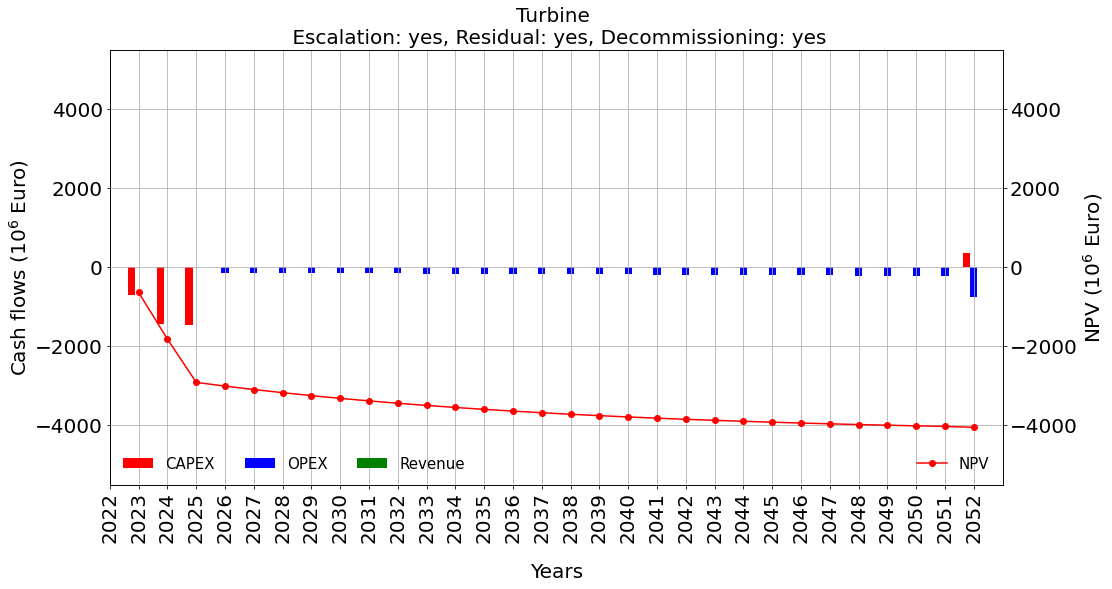

In [6]:
Turbine.generate_cashflows(startyear=2023, lifecycle=30, debug=True)
# na deze regel heeft Turbine.df (dataframe met alleen Capex, Opex en Residuals)
Turbine.df_npv = calculate_npv(Turbine.df, 2023, WACC=0.0984)
create_npv_plot(Turbine.df_npv, title='Turbine \n Escalation: yes, Residual: yes, Decommissioning: yes' )

##### 1.2 Foundations and cables

In [40]:
foundation_data = get_object_data(Inputs=Inputs, 
                               subsystem='Wind energy source & Transport', 
                               element='Offshore wind park',
                               component='Foundation & cable')
foundation_data['depreciation_rate']=1/foundation_data['economic_lifetime']
display(foundation_data)

{'sub_system': 'Wind energy source & Transport',
 'element': 'Offshore wind park',
 'component': 'Foundation & cable',
 'escalation_base_year': 2023,
 'escalation_rate': 0.02,
 'capex_per_unit': 971621.0,
 'capex_per_unit_units': 'EUR / MW',
 'unit': 3000.0,
 'unit_units': 'MW',
 'construction_duration': 3,
 'share_of_investments': [0.2, 0.4, 0.4],
 'economic_lifetime': 30,
 'depreciation_flag': 1,
 'depreciation_rate': 0.03333333333333333,
 'yearly_variable_costs_flag': 1,
 'yearly_variable_costs_rate': 0.015,
 'insurance_flag': 1,
 'insurance_rate': 0.005,
 'decommissioning_rate': 0.35,
 'residual_value': 0.01}

In [41]:
Foundation = Object(**foundation_data)
# hier heb je alleen het object met inputs


*** determine investment_years, capex_years and capex_values ****

initial investment in 2023

divestment year: 2052
divestment value: 304499181.19

CAPEX years escalated: [2023, 2024, 2025, 2052]
CAPEX values escalated: [-594632052.0, -1213049386.08, -1237310373.8016, 304499181.18815994]

*** determine opex_years and opex_values (including decommissioning) ****

investment range start 2026 stop 2052
opex_value -60899836.24, based on a summed_escalated_capex of -3044991811.88 
decommissioning cost of -1065747134.16 added in 2052, based on a summed_escalated_capex of -3044991811.88 

OPEX years escalated: [2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052]
OPEX values escalated: [-65919941.28234628, -67238340.1079932, -68583106.91015308, -69954769.04835613, -71353864.42932326, -72780941.71790972, -74236560.55226792, -75721291.76331328, -77235717.59857954, -78780431.95055114, -

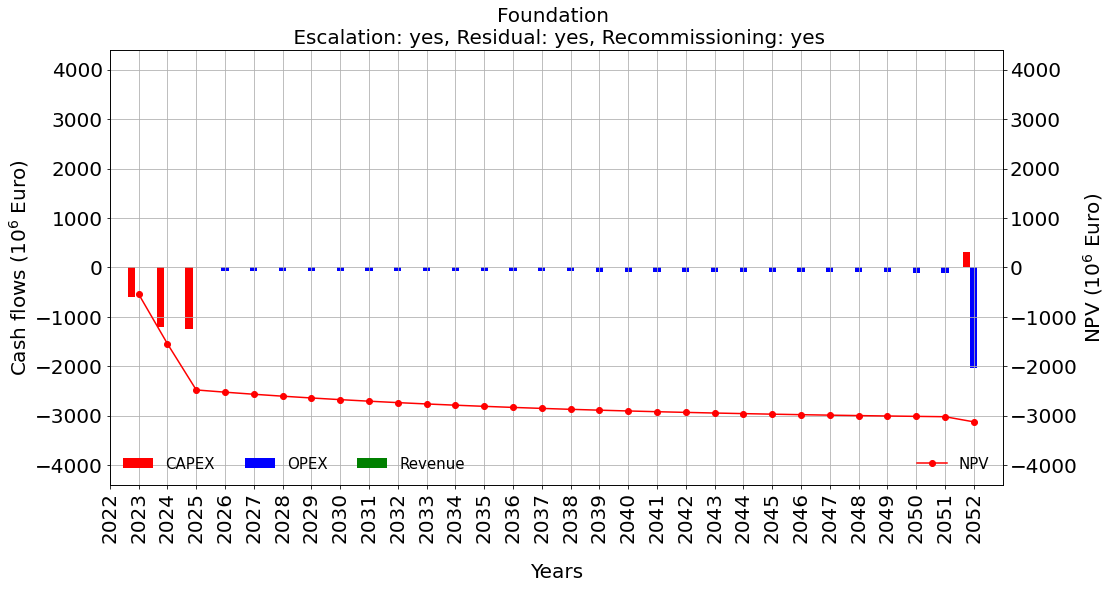

In [42]:
Foundation.generate_cashflows(startyear=2023, lifecycle=30, debug=True)
# na deze regel heeft Turbine.df (dataframe met alleen Capex, Opex en Residuals)
Foundation.df_npv = calculate_npv(Foundation.df, 2023, WACC=0.0984)
create_npv_plot(Foundation.df_npv, title='Foundation \n Escalation: yes, Residual: yes, Recommissioning: yes' )

In [43]:
(Turbine.df+Foundation.df).tail()

,years,capex,opex,revenue,cashflow,cashflow_sum,npv,npv_sum
years,,,,,,,,
2048,4096,0.000000e+00,-3.111576e+08,0,-3.111576e+08,-1.242320e+10,-2.711482e+07,-6.975223e+09
2049,4098,0.000000e+00,-3.173807e+08,0,-3.173807e+08,-1.274058e+10,-2.517946e+07,-7.000403e+09
2050,4100,0.000000e+00,-3.237283e+08,0,-3.237283e+08,-1.306431e+10,-2.338224e+07,-7.023785e+09
2051,4102,0.000000e+00,-3.302029e+08,0,-3.302029e+08,-1.339451e+10,-2.171329e+07,-7.045498e+09
2052,4104,6.617606e+08,-2.784964e+09,0,-2.123203e+09,-1.551771e+10,-1.271089e+08,-7.172607e+09


#####  2. Test values - Turbines
##### 2.1 - CAPEX values

In [44]:
MTBS_values = {'years': [2023, 2024, 2025], 
               'values': [-697_667_148, -1_423_240_982, -1_451_705_802]}

In [45]:
for index, year in enumerate(MTBS_values['years']):
    
    print('CAPEX value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], Turbine.df[Turbine.df.index==year].capex.item()))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  Turbine.df[Turbine.df.index==year].capex.item(), 0)

CAPEX value testing in 2023: MTBS: -697667148 TUD/VO: -697667148.0
CAPEX value testing in 2024: MTBS: -1423240982 TUD/VO: -1423240981.92
CAPEX value testing in 2025: MTBS: -1451705802 TUD/VO: -1451705801.5584


##### 2.2 - OPEX values

In [46]:
MTBS_values = {'years': [2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052],
               'values': [-135_348_928, -138_055_906, -140_817_024, -143_633_365, -146_506_032, -149_436_153, -152_424_876, -155_473_373, -158_582_841, -161_754_497, -164_989_587, -168_289_379, -171_655_167, -175_088_270, -178_590_035, -182_161_836, -185_805_073, -189_521_174, -193_311_598, -197_177_830, -201_121_386, -205_143_814, -209_246_690, -213_431_624, -217_700_257, -222_054_262, -744_198_997]}

In [47]:
for index, year in enumerate(MTBS_values['years']):
    
    print('Opex value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], Turbine.df[Turbine.df.index==year].opex.item()))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  Turbine.df[Turbine.df.index==year].opex.item(), 0)

Opex value testing in 2026: MTBS: -135348928 TUD/VO: -135348927.51436898
Opex value testing in 2027: MTBS: -138055906 TUD/VO: -138055906.06465635
Opex value testing in 2028: MTBS: -140817024 TUD/VO: -140817024.18594947
Opex value testing in 2029: MTBS: -143633365 TUD/VO: -143633364.66966847
Opex value testing in 2030: MTBS: -146506032 TUD/VO: -146506031.96306187
Opex value testing in 2031: MTBS: -149436153 TUD/VO: -149436152.60232309
Opex value testing in 2032: MTBS: -152424876 TUD/VO: -152424875.65436956
Opex value testing in 2033: MTBS: -155473373 TUD/VO: -155473373.16745695
Opex value testing in 2034: MTBS: -158582841 TUD/VO: -158582840.6308061
Opex value testing in 2035: MTBS: -161754497 TUD/VO: -161754497.4434222
Opex value testing in 2036: MTBS: -164989587 TUD/VO: -164989587.39229065
Opex value testing in 2037: MTBS: -168289379 TUD/VO: -168289379.14013648
Opex value testing in 2038: MTBS: -171655167 TUD/VO: -171655166.72293922
Opex value testing in 2039: MTBS: -175088270 TUD/VO: 

##### 2.3 - Decommissioning

In [48]:
MTBS_values = {'years': [2052],
               'values': [ -517703650]} # decommissioning from MTBS

In [49]:
for index, year in enumerate(MTBS_values['years']):
    
    print('Decommissioning value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], Turbine.decommissioning_values[index]))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  Turbine.decommissioning_values[index], 0)

Decommissioning value testing in 2052: MTBS: -517703650 TUD/VO: -285809114.51827204


AssertionError: 
Arrays are not almost equal to 0 decimals
 ACTUAL: -517703650
 DESIRED: -285809114.51827204

#####  3. Test values - Foundations and cables
##### 3.1 - CAPEX values

In [50]:
MTBS_values = {'years': [2023, 2024, 2025], 
               'values': [-594632052, -1213049386, -1237310374,]}


In [51]:
for index, year in enumerate(MTBS_values['years']):
    
    print('CAPEX value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], Foundation.df[Foundation.df.index==year].capex.item()))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  Foundation.df[Foundation.df.index==year].capex.item(), 0)

CAPEX value testing in 2023: MTBS: -594632052 TUD/VO: -594632052.0
CAPEX value testing in 2024: MTBS: -1213049386 TUD/VO: -1213049386.08
CAPEX value testing in 2025: MTBS: -1237310374 TUD/VO: -1237310373.8016


##### 3.2 - OPEX values

In [52]:
MTBS_values = {'years': [2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052],
               'values': [-65_919_941, -67_238_340, -68_583_107, -69_954_769, -71_353_864, -72_780_942, -74_236_561, -75_721_292, -77_235_718, -78_780_432, -80_356_041, -81_963_161, -83_602_425, -85_274_473, -86_979_963, -88_719_562, -90_493_953, -92_303_832, -94_149_909, -96_032_907, -97_953_565, -99_912_636, -101_910_889, -103_949_107, -106_028_089, -108_148_651, -2_040_765_041]}

In [53]:
for index, year in enumerate(MTBS_values['years']):
    
    print('Opex value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], Foundation.df[Foundation.df.index==year].opex.item()))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  Foundation.df[Foundation.df.index==year].opex.item(), 0)

Opex value testing in 2026: MTBS: -65919941 TUD/VO: -65919941.28234628
Opex value testing in 2027: MTBS: -67238340 TUD/VO: -67238340.1079932
Opex value testing in 2028: MTBS: -68583107 TUD/VO: -68583106.91015308
Opex value testing in 2029: MTBS: -69954769 TUD/VO: -69954769.04835613
Opex value testing in 2030: MTBS: -71353864 TUD/VO: -71353864.42932326
Opex value testing in 2031: MTBS: -72780942 TUD/VO: -72780941.71790972
Opex value testing in 2032: MTBS: -74236561 TUD/VO: -74236560.55226792
Opex value testing in 2033: MTBS: -75721292 TUD/VO: -75721291.76331328
Opex value testing in 2034: MTBS: -77235718 TUD/VO: -77235717.59857954
Opex value testing in 2035: MTBS: -78780432 TUD/VO: -78780431.95055114
Opex value testing in 2036: MTBS: -80356041 TUD/VO: -80356040.58956216
Opex value testing in 2037: MTBS: -81963161 TUD/VO: -81963161.4013534
Opex value testing in 2038: MTBS: -83602425 TUD/VO: -83602424.62938048
Opex value testing in 2039: MTBS: -85274473 TUD/VO: -85274473.12196809
Opex val

##### 3.3 - Decommissioning 


In [57]:
MTBS_values = {'years': [2052],
               'values': [-1_930_453_417]} # decommissioning from MTBS, residual from python

In [58]:
for index, year in enumerate(MTBS_values['years']):
    
    print('Residual value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], Foundation.decommissioning_values[-1]))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  Foundation.decommissioning_values[-1], 0)

Residual value testing in 2052: MTBS: -1930453417 TUD/VO: -1065747134.1585599


AssertionError: 
Arrays are not almost equal to 0 decimals
 ACTUAL: -1930453417
 DESIRED: -1065747134.1585599

##### 3.4 - Divestment SUM (Foundation & Cables + Turbines)



In [60]:
MTBS_values = {'years': [2052],
               'values': [ 661_760_574 ]} # decommissioning from MTBS

wind_energy = [Foundation.divestment_values[-1], Turbine.divestment_values[-1]]

for index, year in enumerate(MTBS_values['years']):
    
    print('Divestment value testing in {}: MTBS: {} TUD/VO: {}'.format(year, MTBS_values['values'][index], sum(wind_energy)))
    np.testing.assert_almost_equal(MTBS_values['values'][index],  sum(wind_energy), 0)

Divestment value testing in 2052: MTBS: 661760574 TUD/VO: 661760574.336
